In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

import seaborn as sns

In [ ]:
np.random.normal?

In [ ]:
np.random.seed(11)
n = 25
x = (np.linspace(0, 10, n) + np.random.randn(n)/5).reshape(-1, 1)


In [ ]:
x

In [ ]:
y = np.sin(x) + x/6 + (np.random.randn(n)/10).reshape(-1,1)
y

In [ ]:
plt.figure()
plt.scatter(x, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
plt.figure()
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)


print(f'Train accuracy: {train_score:.1f} Test Accuracy: {test_score:.1f}')

In [ ]:
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, lr.predict(X_test))
print(f'Test R2 Score: {test_r2:.1f}')

In [ ]:
X_predict = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_predict = lr.predict(X_predict)
plt.figure()
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.plot(X_predict, y_predict, alpha=.8, c='y', label='Regression Fit')

### Internal of Gradient Descent 


##### Profits vs Population

In [11]:
f = r'data/poulation-profit.txt'
data = pd.read_csv(f, header=None, names=['Population', 'Profit'])

In [13]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


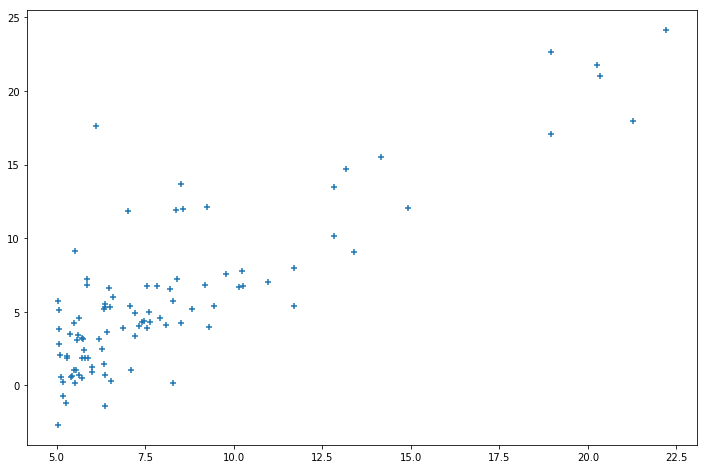

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data.Population, data.Profit, marker='+')

#### LInear Regression

Linear Model of one varaible
$\theta$ = (w, b)

Where w = Slope, b = Intercept (Bias)

$\hat y = (w* x)+b$

$\epsilon = (\hat y - y) = (x*w + b - y)$


#### Vector Terms


In [84]:
def cost(X, y, θ):
    h = np.square(X.dot(θ) - y)
    J = h.mean()/2
    return J

In [124]:

X = np.c_[np.ones(len(data)), data.Population.values]
θ = np.array([[0], [0]])
y = data.Profit.values.reshape(-1, 1)
cost(X, y, θ)

32.072733877455676

In [197]:

t0 = np.linspace(-5, 1, 100)
t1 = np.linspace(-1, 5, 100)

xx, yy = np.meshgrid(t0, t1)
z = np.array([cost(X, y, [[p1],[p2]]) for p1, p2  in zip(xx.ravel(), yy.ravel())]).reshape(yy.shape)

<IPython.core.display.Javascript object>


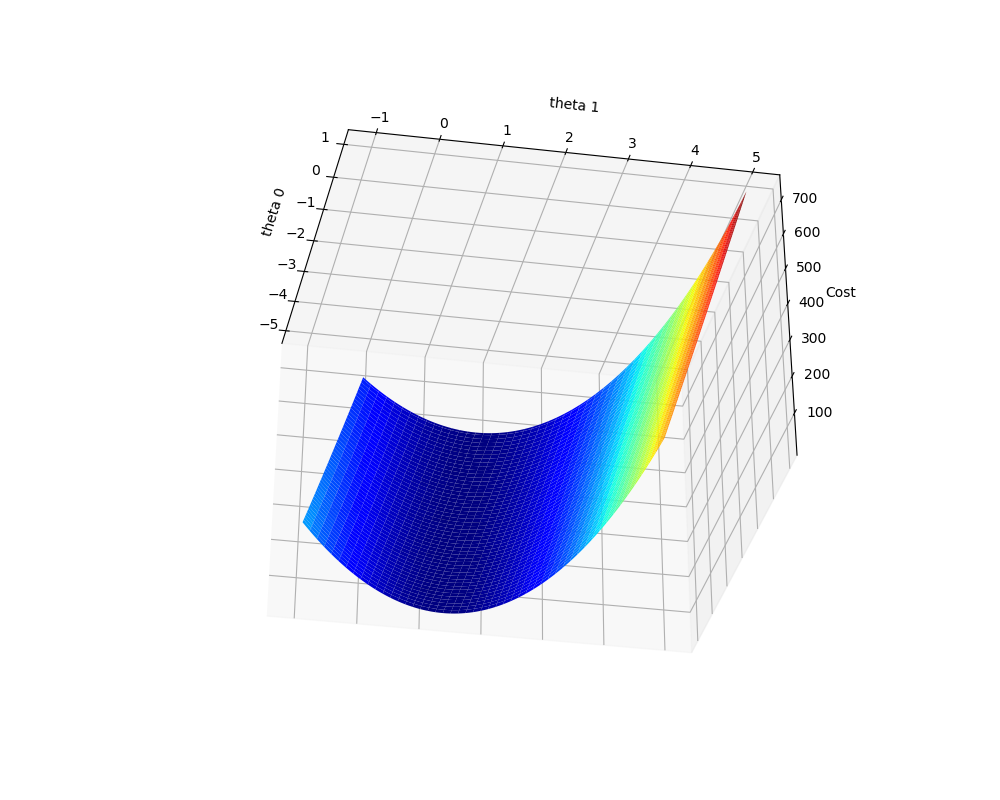

Text(0.5,0,'Cost')

In [198]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, cmap=plt.cm.jet)
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost')

In [194]:
def gradient_descent(X, y, θ, n_iters=3500, learning_rate=.01):
    J_history = []
    m = y.size
    for i in range(n_iters):
        h = X.dot(θ)
        v = X.T.dot(h - y)
        θ = θ - learning_rate * (1/m) * (X.T.dot(h-y))
        J_history.append(cost(X, y, θ))
    return θ, J_history

θ1, J_history = gradient_descent(X, y, θ)

In [195]:
print(θ1)

[[-3.88858772]
 [ 1.19231101]]


<IPython.core.display.Javascript object>


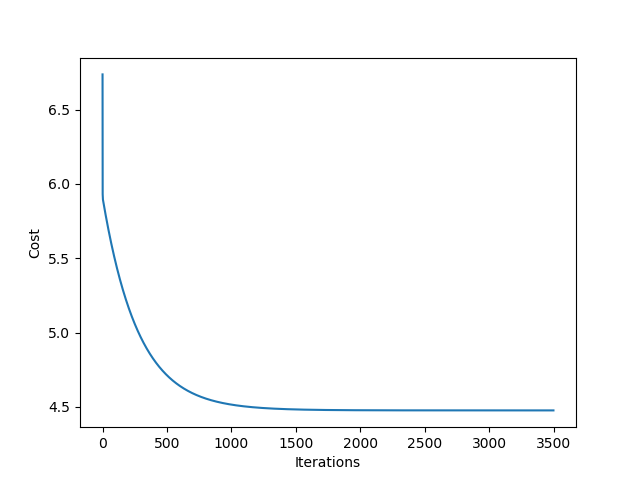

Text(0,0.5,'Cost')

In [196]:
plt.figure()
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')

<IPython.core.display.Javascript object>


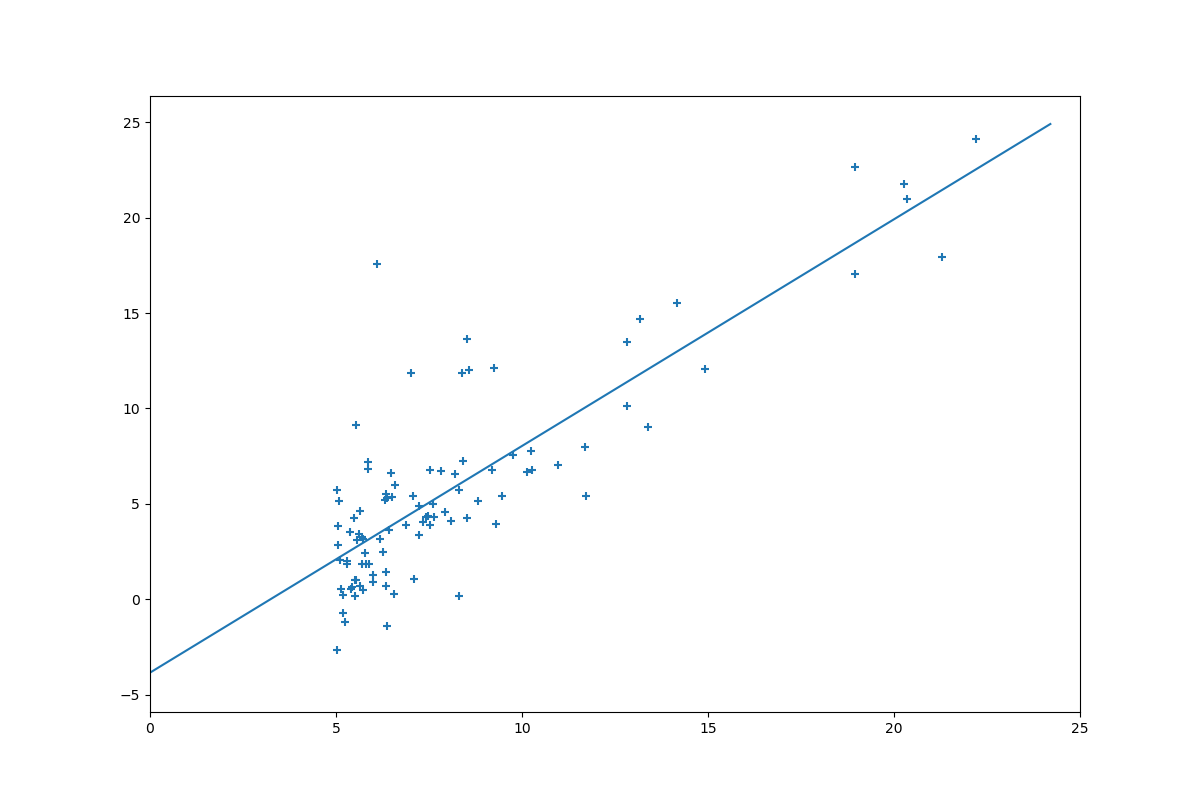

(0, 25)

In [212]:
θ1, J_history = gradient_descent(X, y, θ, n_iters=2500)
x = np.linspace(-.5, data.Population.max()+2, 100)
y_predict = θ1[0] + θ1[1]*x
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data.Population, data.Profit, marker='+')
ax.plot(x, y_predict, label='Linear Regression')
ax.set_xlim([0, 25])